In [103]:
import pandas as pd
import numpy as np
import os
import glob
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
import subprocess
import numpy as np
import scipy
from scipy.optimize import curve_fit
from itertools import cycle
from datetime import datetime

In [104]:
JSON_df = pd.read_csv('JSON_df.csv')

In [105]:
del JSON_df['Unnamed: 0']

In [106]:
JSON_df['time'] = pd.to_datetime(JSON_df['time'])

In [107]:
def specific_time(data, date1, date2):
    data = data
    specific_time_start = data[data['Hour'] >= date1]
    specific_time_end = specific_time_start[specific_time_start['Hour'] <= date2]
    return specific_time_end

In [108]:
## Incorporate the specific time function into the cell below

In [305]:
date = '2020-09-11'

year = date[2:4]

AZmet_data = pd.read_csv(f"https://cals.arizona.edu/azmet/data/06{year}rh.txt", names = ["Year", "Day", "Hour", 
                                        "Air Temperature", "Relative Humidity", 
                                        "VPD", "Solar Radiation", "Precipitation", 
                                        "4 inch Soil T", "12 inch Soil T", 
                                        "Avg Wind Speed", "Wind Vector Magnitude", 
                                        "Wind Vector Direction", "Wind Direction STDEV", 
                                        "Max Wind Speed", "Reference Evapotranspiration", 
                                        "Actual Vapor Pressure", "Dewpoint"])
print("Document downloaded, loaded")

AZmet_df = pd.DataFrame(AZmet_data)

AZmet_df["combined"] = AZmet_df["Year"] * 1000 + AZmet_df["Day"]
AZmet_df["date"] = pd.to_datetime(AZmet_df["combined"], format="%Y%j")
AZmet_df = AZmet_df.set_index("date")

del AZmet_df["combined"]

date_of_interest = AZmet_df[AZmet_df.index == date]
date_of_interest = date_of_interest.reset_index()

# Finds the range of hours the Gantry was scanning on this day
# start = JSON_df['time'][0].floor('H').hour
# end = JSON_df['time'].iloc[-1].ceil('H', ambiguous = True).hour

# start = JSON_df['time'][0].floor('D')
# end = JSON_df['time'].iloc[-1].ceil('D')

# Creates a dataframe with AZmet data only in that range of time
#date_of_interest = specific_time(date_of_interest, start, end)

# date_of_interest['Hour'] = pd.to_timedelta(date_of_interest['Hour'], unit = 'h')
# date_of_interest['Minute'] = pd.to_timedelta(date_of_interest['Minute'], unit = 'm')

# date_of_interest['date'] = date_of_interest['date'] + date_of_interest['Hour']
# date_of_interest = date_of_interest.set_index('date')
# date_of_interest = date_of_interest.reset_index()
print("* * AZmet Date of Interest Gathered * *")

Document downloaded, loaded
* * AZmet Date of Interest Gathered * *


In [308]:
date_of_interest

,date,Year,Day,Hour,Air Temperature,Relative Humidity,VPD,Solar Radiation,Precipitation,4 inch Soil T,12 inch Soil T,Avg Wind Speed,Wind Vector Magnitude,Wind Vector Direction,Wind Direction STDEV,Max Wind Speed,Reference Evapotranspiration,Actual Vapor Pressure,Dewpoint
0,2020-09-11,2020,255,1,19.4,35.0,1.46,0.00,0.0,26.0,29.9,0.7,0.7,151,14,1.7,0.04,0.79,3.5
1,2020-09-11,2020,255,2,17.9,46.0,1.11,0.00,0.0,25.2,29.9,0.9,0.9,99,21,1.7,0.03,0.94,6.0
2,2020-09-11,2020,255,3,18.3,40.1,1.26,0.00,0.0,24.6,29.9,1.4,0.8,145,51,3.0,0.04,0.84,4.5
3,2020-09-11,2020,255,4,17.4,40.5,1.18,0.00,0.0,23.9,29.9,1.2,1.0,136,31,2.0,0.04,0.80,3.8
4,2020-09-11,2020,255,5,15.6,49.2,0.90,0.00,0.0,23.2,29.9,0.6,0.1,104,54,1.8,0.02,0.87,5.0
5,2020-09-11,2020,255,6,15.7,45.3,0.98,0.00,0.0,22.6,29.8,0.9,0.7,216,38,2.0,0.02,0.81,3.9
6,2020-09-11,2020,255,7,15.1,51.3,0.84,0.07,0.0,22.2,29.7,0.3,0.0,237,47,1.8,0.03,0.88,5.1
7,2020-09-11,2020,255,8,16.6,48.8,0.97,0.38,0.0,22.0,29.7,0.7,0.4,9,43,1.7,0.05,0.93,5.8
8,2020-09-11,2020,255,9,19.1,39.6,1.34,0.78,0.0,22.0,29.6,0.5,0.4,157,23,1.8,0.11,0.87,5.0
9,2020-09-11,2020,255,10,22.4,31.9,1.85,1.24,0.0,22.4,29.5,0.3,0.3,204,22,1.5,0.22,0.86,4.8


In [273]:
# start = JSON_df['time'][0].floor('D')
# end = JSON_df['time'].iloc[-1].ceil('D')

In [274]:
# AZmet_df['Hour'] = pd.to_timedelta(AZmet_df['Hour'], unit = 'h')

In [275]:
# AZmet_df['Time'] = AZmet_df['date'] + AZmet_df['Hour']

In [276]:
# AZmet_df = AZmet_df.set_index('Time')

In [277]:
# date_of_interest = AZmet_df[AZmet_df.index >= start]
# date_of_interest = date_of_interest[date_of_interest.index <= end].reset_index()

In [278]:
# date_of_interest['Hour'] = date_of_interest['Time'].dt.hour

Text(0, 0.5, 'Air Temperature (°C)')

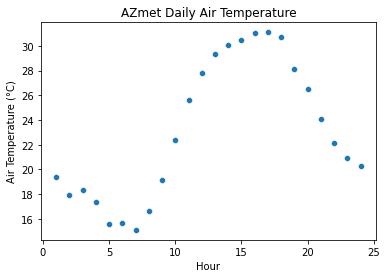

In [307]:
sns.scatterplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature')
plt.title('AZmet Daily Air Temperature')
plt.ylabel('Air Temperature (°C)')
# plt.axvline(11.7, color = 'r', linestyle = 'dotted')
# plt.axvline(13.5, color = 'r', linestyle = 'dotted')
# plt.text(2, 38, '---   Scan Window', bbox=dict(facecolor='salmon', alpha=0.5));

In [280]:
# # ------- Select variables -------
# # x values for Linear Regression
# X = date_of_interest['Hour'].values.reshape(-1,1) # Note, we need X to be a 2D array, hence reshape
# # x values for LOWESS
# x = date_of_interest['Hour'].values 
# # y values for both
# y = date_of_interest['Air Temperature'].values


# # ------- Linear Regression -------
# # Define and fit the model
# lowess = sm.nonparametric.lowess

# model1 = LinearRegression()
# LR = model1.fit(X, y)

# # Predict a few points with Linear Regression model for the grpah
# # Create 20 evenly spaced points from smallest X to largest X
# x_range = np.linspace(X.min(), X.max(), 20) 
# # Predict y values for our set of X values
# y_range = model1.predict(x_range.reshape(-1, 1))


# # ------- LOWESS -------
# # Generate y_hat values using lowess, try a couple values for hyperparameters
# y_hat1 = lowess(y, x) # note, default frac=2/3
# y_hat2 = lowess(y, x, frac=1/5)

In [281]:
# # ------- Define interpolation functions -------
# # Linear - draws a line between the two nearest points and calculates y value based on the slope of that line
# f_linear = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='linear', fill_value='extrapolate') 
# # Nearest - finds the nearest available point and takes its y value
# f_nearest = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='nearest', fill_value='extrapolate') 

# # Create a new set of points with x values 
# xnew = np.arange(0, 24, 0.1)

# # Find y values based on the two different interpolation methods
# ynew_linear = f_linear(xnew)
# ynew_nearest = f_nearest(xnew)

In [282]:
# sns.scatterplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature')
# plt.plot(xnew, ynew_linear)
# plt.title('Lowess Model');

In [283]:
# sns.lineplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature')

## Attempt using non-linear regression

In [284]:
# # define the true objective function
# def objective(x, a, b, c):
# 	return a * x + b * x**2 + c

In [285]:
# from numpy import arange
# from pandas import read_csv
# from scipy.optimize import curve_fit
# from matplotlib import pyplot
 
# # define the true objective function
# def objective(x, a, b, c):
# 	return a * x + b * x**2 + c
 
# # load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
# dataframe = read_csv(url, header=None)
# data = dataframe.values
# # choose the input and output variables
# x, y = date_of_interest['Hour'].values, date_of_interest['Air Temperature'].values
# # curve fit
# popt, _ = curve_fit(objective, x, y)
# # summarize the parameter values
# a, b, c = popt
# print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# # plot input vs output
# pyplot.scatter(x, y)
# # define a sequence of inputs between the smallest and largest known inputs
# x_line = arange(min(x), max(x), 0.01)
# # calculate the output for the range
# y_line = objective(x_line, a, b, c)
# # create a line plot for the mapping function
# pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.show()

In [286]:
# xrange = np.arange(start, end, 0.016667)
# ynew_list = []

# for x in xrange:
#     ynew = a * x + b * x**2 + c # a, b, and c were defined in the previous cell
#     ynew_list.append(ynew)

In [287]:
# plt.plot(xrange, ynew_list);
# Worked well when I subsetted the time of day before fitting the line and predicting values
## Might be best to fit a non-linear regression from the daily values rather than when the scans were happening

## Using polynomisl regression

In [288]:
# data_x = date_of_interest['Hour'].values
# data_y = date_of_interest['Air Temperature'].values

# # Dividing data into train and validation datasets
# from sklearn.model_selection import train_test_split
# train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# # Visualize the relationship b/w age and wage
# import matplotlib.pyplot as plt
# plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
# plt.show()

In [289]:
# from sklearn.linear_model import LinearRegression

# # Fitting linear regression model
# x = train_x.reshape(-1,1)
# model = LinearRegression()
# model.fit(x,train_y)
# print(model.coef_)
# print(model.intercept_)

In [290]:
# # Prediction on validation dataset
# valid_x = valid_x.reshape(-1,1)
# pred = model.predict(valid_x)

# # Visualisation
# # We will use 70 plots between minimum and maximum values of valid_x for plotting
# xp = np.linspace(valid_x.min(),valid_x.max(),70)
# xp = xp.reshape(-1,1)
# pred_plot = model.predict(xp)

# plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
# plt.plot(xp, pred_plot)
# plt.show()

In [291]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# rms = sqrt(mean_squared_error(valid_y, pred))
# print(rms)

In [292]:
# #Generating weights for polynomial function with degree =2
# weights = np.polyfit(train_x, train_y, 7)
# print(weights)

# # Generating model with the given weights
# model = np.poly1d(weights)

# # Prediction on validation set
# pred = model(valid_x)
# # We will plot the graph for 70 observations only
# xp = np.linspace(valid_x.min(),valid_x.max(),30)
# pred_plot = model(xp)
# plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.9)
# plt.plot(xp, pred_plot)
# plt.title('Polynomial Regression Degree = 7')
# plt.show()

## Regression splines

In [301]:
from scipy.interpolate import UnivariateSpline

x, y = date_of_interest['Hour'].values, date_of_interest['Air Temperature'].values
w = np.isnan(y)
spl = UnivariateSpline(x, y)
#spl.set_smoothing_factor(100)

In [302]:
# sns.scatterplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature')
# plt.plot(x, spl(x), 'r', lw=3)

In [303]:
xrange = np.arange(0, 24, 0.01667)

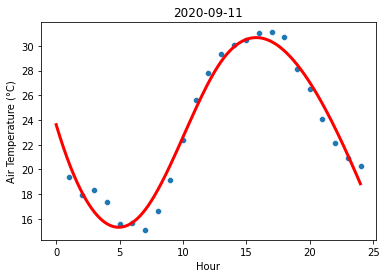

In [304]:
sns.scatterplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature')
plt.plot(xrange, spl(xrange), 'r', lw=3)
plt.title(date)
plt.ylabel('Air Temperature (°C)');

In [49]:
# minute_cycle = cycle(np.arange(0, 60, 1))
# d = {'Minute': np.arange(len(xrange)), 'Air Temperature': spl(xrange)}
# test = pd.DataFrame(data = d)

In [50]:
# hour_list = np.arange(0, 24, 1)

In [51]:
# K = 60
  
# # using list comprehension
# # repeat elements K times
# res =  [ele for ele in hour_list for i in range(K)]

In [52]:
# test['Hour'] = res

In [53]:
# minute_cycle = cycle(np.arange(0, 60, 1))

In [54]:
# test['Minute'] = [next(minute_cycle) for cycle in range(len(test))]

In [55]:
# year = date_of_interest['Year'].unique()
# date = date_of_interest['date'].unique()
# test['Year'] = year[0]
# test['date'] = date[0]

In [56]:
# test['Hour'] = pd.to_timedelta(test['Hour'], unit = 'h')
# test['Minute'] = pd.to_timedelta(test['Minute'], unit = 'm')

# test['date'] = test['date'] + test['Hour'] + test['Minute']

In [57]:
# time = JSON_df['time'][21]
# result_index = test['date'].sub(time).abs().idxmin()
# test['Air Temperature'].iloc[result_index]

In [98]:
def splines(df, xvar, yvar): #xvar would be the information you want to use ex: df['Hour']
    xdata = df[xvar]
    ydata = df[yvar]
    x, y = xdata.values, ydata.values
    spl = UnivariateSpline(x, y)
    
    xrange = np.arange(0, 24, 0.01667)
    
    d = {'Minute': np.arange(len(xrange)), yvar: spl(xrange)}
    finer_df = pd.DataFrame(data = d)
    
    hour_list = np.arange(0, 24, 1)
    
    K = 60
    res =  [ele for ele in hour_list for i in range(K)]
    
    finer_df['Hour'] = res

    minute_cycle = cycle(np.arange(0, 60, 1))
    finer_df['Minute'] = [next(minute_cycle) for cycle in range(len(finer_df))]
    
    year = date_of_interest['Year'].unique()
    date = date_of_interest['date'].unique()
    finer_df['Year'] = year[0]
    finer_df['date'] = date[0]
    
    finer_df['Hour'] = pd.to_timedelta(finer_df['Hour'], unit = 'h')
    finer_df['Minute'] = pd.to_timedelta(finer_df['Minute'], unit = 'm')

    finer_df['date'] = finer_df['date'] + finer_df['Hour'] + finer_df['Minute']
    return finer_df

In [99]:
def residual(AZmet, finer_df):
    top_hour = finer_df.loc[finer_df['date'].dt.minute == 0].reset_index()
    top_hour['Original_Temp'] = AZmet['Air Temperature']
    top_hour['Hour'] = AZmet['Hour']
    top_hour['residual'] = top_hour['Air Temperature'] - top_hour['Original_Temp']
    return top_hour

In [100]:
def retrieve_splines(df):
    temp_df = splines(df, 'Hour', 'Air Temperature')
    temp_df['VPD'] = splines(df, 'Hour', 'VPD')['VPD']
    temp_df['Relative Humidity'] = splines(df, 'Hour', 'Relative Humidity')['Relative Humidity']
    temp_df['Avg Wind Speed'] = splines(df, 'Hour', 'Avg Wind Speed')['Avg Wind Speed']
    return temp_df

In [101]:
temp_df = splines(date_of_interest, 'Hour', 'Air Temperature')
# vpd_df = splines(date_of_interest, 'Hour', 'VPD')
# rh_df = splines(date_of_interest, 'Hour', 'Relative Humidity')
# wind_df = splines(date_of_interest, 'Hour', 'Avg Wind Speed')
#top_hour = residual(date_of_interest, finer_df)

In [61]:
# top_hour = real_test.loc[real_test['date'].dt.minute == 0]

In [62]:
# top_hour = top_hour.reset_index()

In [63]:
# top_hour['Original_Temp'] = date_of_interest['Air Temperature']
# top_hour['Hour'] = date_of_interest['Hour']

In [64]:
# top_hour['residual'] = top_hour['Air Temperature'] - top_hour['Original_Temp']

In [65]:
# # Residual vs Hour Plot
# sns.scatterplot(data = top_hour, x = 'Hour', y = 'residual')
# plt.ylabel('$T_{azmet}$ - $T_{predicted}$ (°C)')
# plt.title('Residuals vs Hour ' + date)
# plt.ylim(-4.0, 4.0)
# plt.axhline(y=0, color='r', linestyle='dotted');

In [66]:
# # Predicted vs Actual Graph with r2 value
# r, p = scipy.stats.pearsonr(top_hour['Original_Temp'], top_hour['Air Temperature'])

# sns.regplot(data = top_hour, x = 'Original_Temp', y = 'Air Temperature')
# plt.ylabel('Predicted Temperature (°C)')
# plt.xlabel('Actual Temperature (°C)')
# plt.text(22.5, 37, '$r^2$' '={:.2f}'.format(r**2), size = 16)
# plt.title('Predicted vs Actual ' + date);

In [67]:
temp_df['VPD'] = splines(date_of_interest, 'Hour', 'VPD')['VPD']
temp_df['Relative Humidity'] = splines(date_of_interest, 'Hour', 'Relative Humidity')['Relative Humidity']
temp_df['Avg Wind Speed'] = splines(date_of_interest, 'Hour', 'Avg Wind Speed')['Avg Wind Speed']

In [68]:
temp_df['Hour'] = temp_df['date'].dt.hour
temp_df['Minute'] = temp_df['date'].dt.minute

In [69]:
# For graphing purposes
# temp_df['HourMin'] = temp_df['Hour'].astype(str) + '.' + temp_df['Minute'].astype(str)
# temp_df['HourMin'] = pd.to_numeric(temp_df['HourMin'])

In [70]:
# sns.scatterplot(data = temp_df, x = 'HourMin', y = 'Air Temperature', color = 'black')
# sns.scatterplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature', color = 'cornflowerblue');

In [71]:
# sns.lineplot(data = date_of_interest, x = 'Hour', y = 'Air Temperature', color = 'cornflowerblue', label = 'Air Temperature')
# sns.lineplot(data = date_of_interest, x = 'Hour', y = 'Max Wind Speed', color = 'red', label = 'Max Wind Speed')
# plt.title('Wind effect on Air Temperature');

In [72]:
temp_df['date'] = pd.to_datetime(temp_df['date'])

In [73]:
time = JSON_df['time'][0]

In [74]:
timestamp = time.round('min')

In [75]:
result_index = temp_df[temp_df['date'] == timestamp].index.values[0]

In [76]:
temp_df["Air Temperature"].iloc[result_index]

13.661369748057407

## Environmental Logger

In [77]:
time = JSON_df["time"][0]
timestamp = time.round("min")

In [78]:
EnvL_data = pd.read_csv('2020-02-16_clean.csv')
EnvL_data["Time"] = pd.to_datetime(EnvL_data["Time"])
Envlog_clean = EnvL_data[
    [
        "Time",
        "Sun Direction",
        "Temperature",
        "Photosynthetically active radiation",
        "Wind velocity",
    ]
]

In [79]:
EnvLog = Envlog_clean.set_index("Time")
EnvLog = Envlog_clean.reset_index()

In [80]:
result_index_env  = EnvLog[EnvLog["Time"] == timestamp].index.values[0]

In [81]:
Env_temp = EnvLog["Temperature"].iloc[result_index_env]

In [82]:
Env_temp

16.6820276498

## Dealing with Sorghum Season 11 Issues

In [36]:
import pandas as pd

In [37]:
result = pd.read_csv('result.csv')
plant_detections = pd.read_csv('2020-09-11__23-00-48-992-individual_thermal.csv')

In [38]:
result = result.set_index('plot')

In [39]:
plant_detections["norm_temp"] = plant_detections["atm_temp"] = None

In [40]:
for i, row in plant_detections.iterrows():

        try:
            plot = row["plot"]
            plant_temp = row["median"]

            temp_df = result.loc[plot]
            atm_temp = temp_df["median"]
            norm_temp = atm_temp - plant_temp

            azmet_wind_vel = temp_df["azmet_wind_velocity"]
            azmet_vpd = temp_df["azmet_VPD"]
            sol_rad = temp_df["azmet_solar_radiation"]
            rel_hum = temp_df["relative_humidity"]
        
            plant_detections.at[i, "norm_temp"] = norm_temp
            plant_detections.at[i, "atm_temp"] = atm_temp

            plant_detections.at[i, "azmet_wind_velocity"] = azmet_wind_vel
            plant_detections.at[i, "azmet_VPD"] = azmet_vpd
            plant_detections.at[i, "azmet_solar_radiation"] = sol_rad
            plant_detections.at[i, "relative_humidity"] = rel_hum
        except:
            pass